In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numba import jit
plt.rcParams.update({'font.size': 16})


In [2]:
def WienerProcess(N, D, dt):
    x = np.zeros(N)
    sqdt = np.sqrt(2*D*dt)
    for i in range(N-1):
        x[i+1] = x[i] + sqdt*np.random.randn()
    return x
    

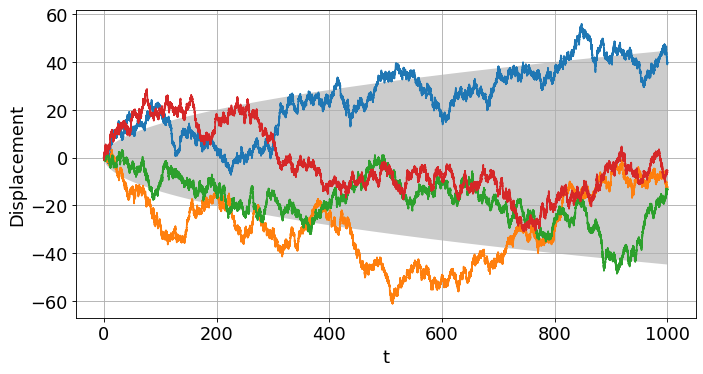

In [6]:
fig = plt.figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')

N, D, dt = int(1e5), 1, 0.01
timeArray = dt*np.arange(N)

SD = np.sqrt(2*D*timeArray)
plt.fill_between(timeArray, -SD,  SD ,alpha=0.2, facecolor='k')

plt.plot(timeArray, WienerProcess(N, D, dt))
plt.plot(timeArray, WienerProcess(N, D, dt))
plt.plot(timeArray, WienerProcess(N, D, dt))
plt.plot(timeArray, WienerProcess(N, D, dt))
plt.grid()
plt.xlabel('t'); plt.ylabel('Displacement');

## MSD

In the following, we write a code to compute MSD. 

$$
\mathrm{MSD} (t)=    \langle \left[x(t+\tau)- x(\tau)\right]^2\rangle=\left(2D\right)t
$$


In [18]:
@jit(nopython=False)
def MSD1d(d2, xt, Nm, Nt):
    for i in range(Nm): 
        dr2=0
        for j in range(Nt-i):
            dx = xt[i+j] - xt[j]
            dr2 += dx*dx
        d2[i] = dr2/(Nt-i)
    return  

In [19]:
xt=WienerProcess(N, D, dt)

In [20]:
Nm=int(0.001*N)
d2 = np.zeros(Nm)

In [21]:
import time

In [22]:
t1=time.perf_counter()
MSD1d(d2, xt, Nm, N)

print (time.perf_counter()-t1)

1.5742506400000025


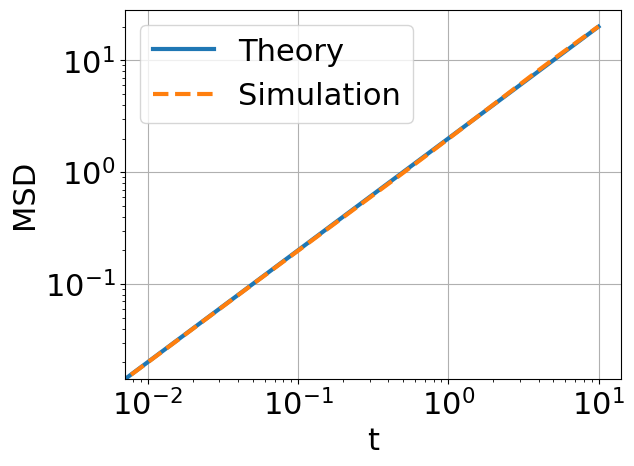

In [23]:
timeArray = dt*np.arange(Nm)
plt.plot(timeArray, 2*D*timeArray, label='Theory', lw=3)

plt.loglog(timeArray, d2, '--', label='Simulation', lw=3)


plt.grid(); plt.legend();
plt.xlabel('t'); plt.ylabel('MSD');

## OUP

Ornstein-Uhlenbeck process is a continuous stochastic process that is simultaneously stationary, Gaussian, and Markovian. OUP is used in many branches of science and engineering to describe the regression of a system to its stationary mean.

In [10]:
N=10**6

x=np.zeros(N)

D=1
dt = 0.01
sqdt = np.sqrt(2*D*dt) 
k=1
mup=1

for i in range(N-1):
    x[i+1] = x[i] -mup*k*x[i]*dt + sqdt*np.random.randn() 

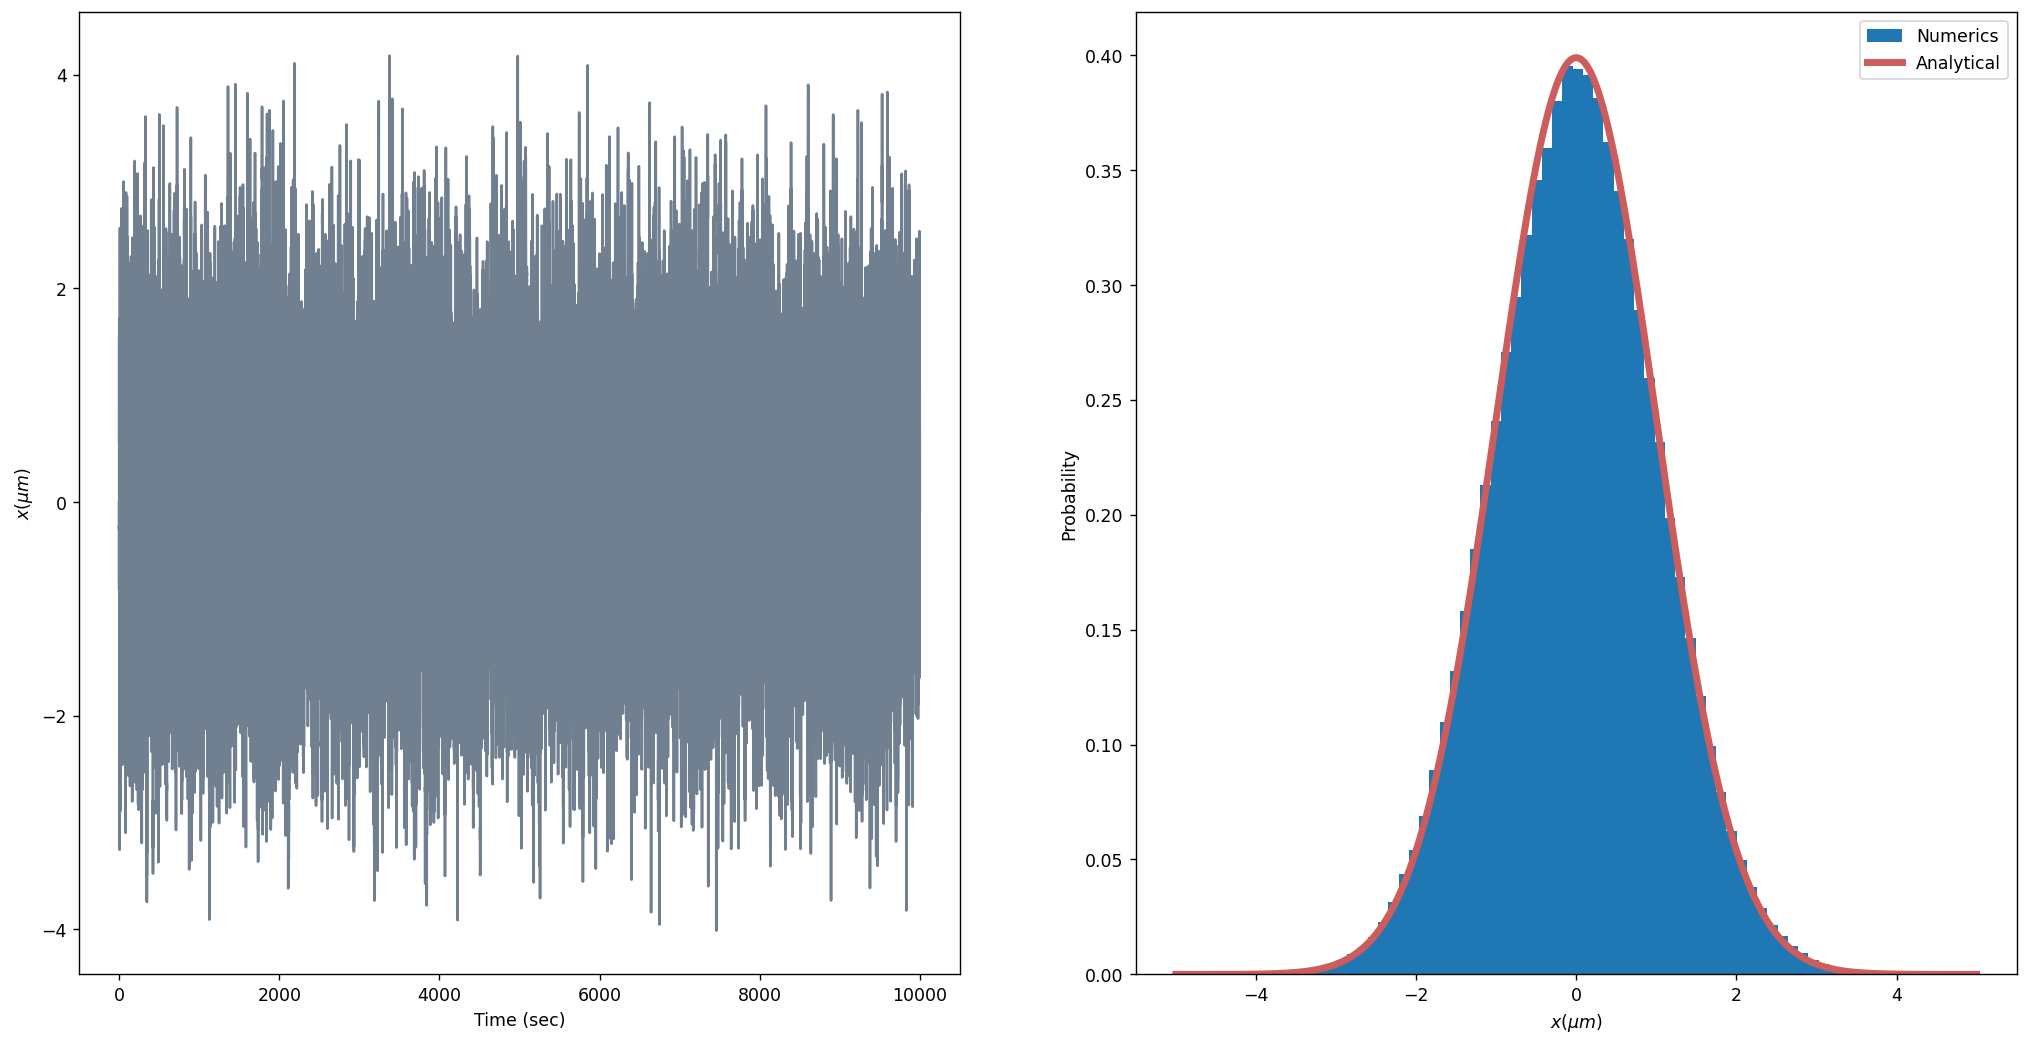

In [11]:
fig = plt.figure(num=None, figsize=(20, 10), dpi=125);
plt.subplot(121)
plt.plot(dt*np.arange(N), x, c='slategrey')
plt.xlabel(r'Time (sec)')
plt.ylabel(r'$x(\mu m)$')

plt.subplot(122)
plt.hist(x, 64, density=True, label='Numerics');
xt = np.linspace(-5, 5, 256)
y = np.exp(-0.5*xt**2)/(np.sqrt(2*np.pi))
plt.plot(xt, y, c='indianred', lw=4, label='Analytical')
plt.legend()
plt.xlabel(r'$x(\mu m)$')
plt.ylabel(r'Probability');